# Analisis exploratorio de datos (aka E.D.A) 

## Conjunto de datos a explorar: `clicks`

In [1]:
#Imports
import pandas as pd
import numpy as np

from IPython.display import display, Markdown as md
import seaborn as sns
import matplotlib.pyplot as plt

### Carga de los datos

In [2]:
 clicks = pd.read_csv("../data/clicks.csv.gzip", parse_dates=["created"], compression='gzip')

### Informacion sobre el conjunto de datos

In [3]:
clicks.shape

(26351, 20)

In [4]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null datetime64[ns]
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(11), int64(6), object(

### Cantidad de Nulos

In [5]:
clicks.isna().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

## Tratamiento por atributo

### `advertiser_id `

In [6]:
clicks['advertiser_id'].head()

0    2
1    0
2    0
3    2
4    2
Name: advertiser_id, dtype: int64

In [7]:
clicks['advertiser_id'].value_counts()

3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

> `advertiser_id` es un atributo que contiene valores entre `[0..8]` se procede a cambiar el tipo de la columna a `int8`

In [8]:
clicks['advertiser_id'] = pd.to_numeric(clicks['advertiser_id'], downcast='integer')

In [9]:
clicks.shape

(26351, 20)

### `action_id `

In [10]:
clicks['action_id'].head(10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: action_id, dtype: float64

In [11]:
clicks['action_id'].isna().sum()

26351

In [12]:
clicks['action_id'].unique()

array([nan])

> El atributo o columna `action_id` en todas sus filas repite el valor `nan`, se procede a eliminar la columna.

In [13]:
clicks.drop(columns=['action_id'], inplace=True)

In [14]:
clicks.shape

(26351, 19)

### `source_id `

In [15]:
clicks['source_id'].head(10)

0    4
1    0
2    0
3    3
4    3
5    4
6    1
7    2
8    0
9    1
Name: source_id, dtype: int64

In [16]:
clicks['source_id'].value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

> `source_id` es un atributo que contiene valores entre `[0..10]` se procede a cambiar el tipo de la columna a `int8`

In [17]:
clicks['source_id'] = pd.to_numeric(clicks['source_id'], downcast='integer')

In [18]:
clicks.shape

(26351, 19)

### `created`

In [19]:
clicks['created'].head(10)

0   2019-03-06 22:42:12.755
1   2019-03-08 10:24:30.641
2   2019-03-08 15:24:16.069
3   2019-03-06 03:08:51.543
4   2019-03-06 03:32:55.570
5   2019-03-07 18:02:25.833
6   2019-03-12 15:17:04.453
7   2019-03-06 19:15:47.249
8   2019-03-07 23:11:01.934
9   2019-03-07 23:06:30.642
Name: created, dtype: datetime64[ns]

> No se pueden tomar acciones sobre el atributo `created`

In [33]:
auctions['platform'] = pd.to_numeric(auctions['platform'], downcast='integer')

In [34]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 5 columns):
date           datetime64[ns]
device_id      int64
platform       int8
ref_type_id    int64
source_id      int64
dtypes: datetime64[ns](1), int64(3), int8(1)
memory usage: 615.9 MB


#### `ref_type_id`

In [35]:
auctions['ref_type_id'].head()

0    1
1    1
2    1
3    1
4    1
Name: ref_type_id, dtype: int64

In [36]:
auctions['ref_type_id'].describe()

count    1.957132e+07
mean     2.235326e+00
std      2.426093e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      7.000000e+00
Name: ref_type_id, dtype: float64

> Todo parece indicar que el atributo `ref_type_id` no requieran un tipo de dato `int64`, se procede a convertirlo en un `int8`

In [44]:
#auctions['ref_type_id'] = pd.to_numeric(auctions['ref_type_id'], downcast='integer')
#Se utiliza 'astype' solamente a fines practicos y no porque haya alguna diferencia real.
auctions['ref_type_id'] = auctions['ref_type_id'].astype(np.int8)

In [45]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 5 columns):
date           datetime64[ns]
device_id      int64
platform       int8
ref_type_id    int8
source_id      int64
dtypes: datetime64[ns](1), int64(2), int8(2)
memory usage: 485.3 MB


#### `source_id`

In [46]:
auctions['source_id'].head()

0    0
1    0
2    0
3    0
4    0
Name: source_id, dtype: int64

In [47]:
auctions['source_id'].unique()

array([0, 5, 6, 1, 2])

> Por lo observado en el atributo `source_id` se procede a la conversion de tipo `int8`

In [48]:
auctions['source_id'] = auctions['source_id'].astype(np.int8)

In [49]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 5 columns):
date           datetime64[ns]
device_id      int64
platform       int8
ref_type_id    int8
source_id      int8
dtypes: datetime64[ns](1), int64(1), int8(3)
memory usage: 354.6 MB


In [50]:
display(auctions.head())

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [57]:
days = auctions['date'].apply(lambda x: x.date())
counts_by_day = days.value_counts().sort_index()

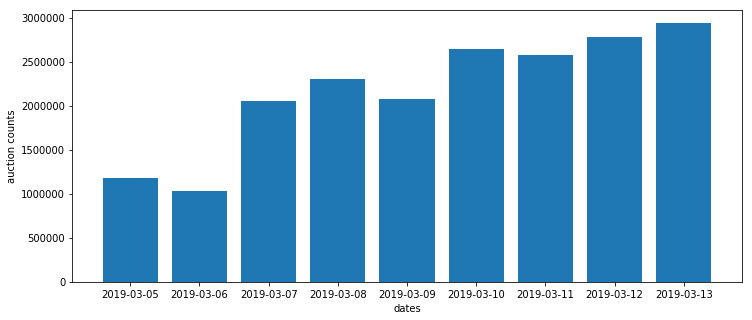

In [67]:
# Config
%matplotlib inline
#pd.options.display.max_columns = None
#plt.figure(figsize=(10, 10));
fig, ax = plt.subplots(figsize=(12,5))

ax.set_xlabel('dates')
ax.set_ylabel('auction counts')

plt.bar(counts_by_day.index, counts_by_day.values)
plt.show()